### Loading data

In [1]:
from google.colab import drive
import pickle, json 
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
'''Initializaing data structure MSW'''
!gdown --id 1_k1H_JyXwyRoRFcXa_YKGXgqxOg1Kx5a 
W2VDIR = '/content/drive/MyDrive/110-1ComSem_final/w2v_resources'
W2VSEGDIR = '/content/drive/MyDrive/110-1ComSem_final/w2v_SegTexts'
List_file = f'{W2VDIR}/MSW_leveled_list3.pkl'
with open (List_file, 'rb') as F:
  leveled_list = pickle.load(F)

Downloading...
From: https://drive.google.com/uc?id=1_k1H_JyXwyRoRFcXa_YKGXgqxOg1Kx5a
To: /content/MSW.py
100% 642/642 [00:00<00:00, 1.28MB/s]


In [6]:
EmbeddingPath = '/content/drive/MyDrive/110-1ComSem_final/w2v_resources/TrainedC_embeddings.wv'
from gensim.models import Word2Vec
w2vmodel = Word2Vec.load(EmbeddingPath)

### EDA

In [7]:
import matplotlib as mpl
import matplotlib.font_manager as fm
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
fm.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2022-01-12 18:34:43--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.193.138, 172.217.193.102, 172.217.193.101, ...
Connecting to drive.google.com (drive.google.com)|172.217.193.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qvcabnsivem16uetjo7mioi5upsk5gvj/1642012425000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-01-12 18:34:47--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qvcabnsivem16uetjo7mioi5upsk5gvj/1642012425000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.141.132, 2607:f8b0:400c:c06::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|74

In [ ]:
msw_dict = {}
msw_names = []
fsense_count = []
csense_count = []
for msw in leveled_list:
  msw_names.append(msw.word)
  fsenseC = len(msw.senses)
  fsense_count.append(fsenseC)
  csense = set(x["category"] for x in msw.senses)
  print(csense)
  csense_count.append(len(csense))

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt

In [11]:
def fsense_cat(i):
  if i < 5: return '< 5'
  elif 5 <= i < 15: return '5 ~ 14'
  elif 15 <= i < 30: return '15 ~ 29'
  else: return '>30'
def csense_cat(i):
  # '< 2', '2 ~ 4', '5 ~ 9', '>10'
  if i < 3: return  '< 3'
  elif 3 <= i < 6: return '3 ~ 5'
  elif 6 <= i < 16: return '6 ~ 15'
  else: return '>15'

In [12]:
msw_dict = {'target': msw_names, 'fsense#': fsense_count, 'csense#': csense_count}
DF = pd.DataFrame.from_dict(msw_dict)
DF['csense_cat'] = DF.apply(lambda x: csense_cat(x['csense#']), axis=1)
DF['fsense_cat'] = DF.apply(lambda x: fsense_cat(x['fsense#']), axis=1)

In [13]:
csize = DF['csense_cat'].value_counts().tolist()
ckeys = DF['csense_cat'].value_counts().keys().tolist()
print(csize)
print(ckeys)

[102, 33, 29]
['3 ~ 5', '< 3', '6 ~ 15']


In [23]:
len(w2vmodel.wv.vocab) # 72275
# dim 200

72275

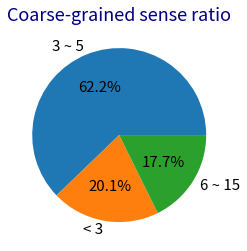

In [18]:
plt.pie(csize, labels = ckeys, autopct='%1.1f%%',
textprops={'fontsize': 15, 'color': 'black'})
plt.title('Coarse-grained sense ratio', fontsize = 18, color= 'navy')
plt.show()

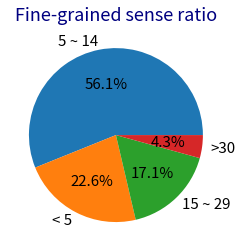

In [19]:
fsize = DF['fsense_cat'].value_counts().tolist()
fkeys = DF['fsense_cat'].value_counts().keys().tolist()
plt.pie(fsize, labels = fkeys, autopct='%1.1f%%',
textprops={'fontsize': 15, 'color': 'black'})
plt.title('Fine-grained sense ratio', fontsize = 18, color= 'navy')
plt.show()

In [20]:
W2VDIR = '/content/drive/MyDrive/110-1ComSem_final/w2v_resources'
DF.to_csv(f'{W2VDIR}/msw_eda.csv')

In [21]:
DF

,target,fsense#,csense#,csense_cat,fsense_cat
0,八仙,8,4,3 ~ 5,5 ~ 14
1,巴比倫,9,4,3 ~ 5,5 ~ 14
2,巴黎,1,1,< 3,< 5
3,白宮,11,4,3 ~ 5,5 ~ 14
4,半島,11,5,3 ~ 5,5 ~ 14
...,...,...,...,...,...
159,鑽石,16,7,6 ~ 15,15 ~ 29
160,華,10,5,3 ~ 5,5 ~ 14
161,黃海,13,4,3 ~ 5,5 ~ 14
162,黃河,19,6,6 ~ 15,15 ~ 29


In [64]:
DF.mean()

fsense#    11.030488
csense#     3.951220
dtype: float64

### PCA

In [68]:
wsdlist = [msw.word for msw in leveled_list]

In [111]:
x = [i for i in leveled_list if i.word == '蘋果']
x[0].senses

[{'category': 'main',
  'gloss': '蘋果樹（學名：Malus domestica）是薔薇科蘋果亞科蘋果屬植物，為落葉喬木，在世界上廣泛種',
  'ismain': True,
  'link': 'https://zh.wikipedia.org/wiki/%E8%8B%B9%E6%9E%9C',
  'sense': '蘋果',
  'senseidx': 1,
  'views': 34481},
 {'category': '公司',
  'gloss': '蘋果公司，著名電子產品生產商。蘋果園區，蘋果公司於2017年4月起啓用的公司總部新址',
  'ismain': False,
  'link': 'https://zh.wikipedia.org/wiki/%E8%98%8B%E6%9E%9C%E5%85%AC%E5%8F%B8',
  'sense': '蘋果公司',
  'senseidx': 2,
  'views': 978087},
 {'category': '公司',
  'gloss': '蘋果公司，著名電子產品生產商。蘋果園區，蘋果公司於2017年4月起啓用的公司總部新址',
  'ismain': False,
  'link': 'https://zh.wikipedia.org/wiki/%E8%98%8B%E6%9E%9C%E5%9C%92%E5%8D%80',
  'sense': '蘋果園區',
  'senseidx': 3,
  'views': 72457},
 {'category': '公司',
  'gloss': '蘋果唱片公司（英語：Apple Corps），披頭士樂團創立的唱片公司',
  'ismain': False,
  'link': '',
  'sense': '蘋果唱片公司',
  'senseidx': 4,
  'views': -1},
 {'category': '報紙',
  'gloss': '蘋果日報。蘋果日報 (香港)，香港公司壹傳媒在香港發行的報紙。蘋果日報 (臺灣)，香港公司壹傳媒在臺灣發行的報紙。蘋果日報慈善基金，香港一個慈善基金，由壹傳媒有限公司於1995年成立',
  'ismain': False,
  'link': 'http

In [100]:
apple_similar_words = {
    search_term:
    [item[0] for item in w2vmodel.wv.most_similar([search_term], topn=10)]
    for search_term in
    ['蘋果_1', '蘋果_2', '蘋果_3', '蘋果_4', '蘋果_5',
     '蘋果_6', '蘋果_7', '蘋果_8','蘋果_9']
}
flat_similar_words = [item for sublist in apple_similar_words.values() for item in sublist]

In [103]:
from sklearn.decomposition import PCA
import random
import numpy as np
random.seed(29)
words = list(w2vmodel.wv.index2word)
# sampling = random.sample(range(len(words)), 100)
embeddings= []
embedding_names = []
for i, w in enumerate(words):
  if w in flat_similar_words or w.split('_')[0] == '蘋果': 
    embedding_names.append(w)
    embeddings.append(w2vmodel.wv[w])
X = np.vstack(embeddings)
X_normed = (X  - X.mean(axis=0)) / X.std(axis=0)
pca = PCA(n_components=2)
X_res = pca.fit_transform(X_normed)

In [104]:
X_normed.shape # 404600 ??? 

(78, 200)

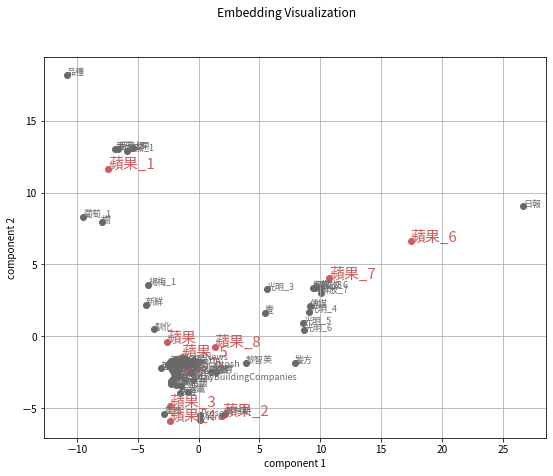

In [119]:
my_colors = {'蘋果':'coral'}
for i, (embid, text) in enumerate(zip(X_res, embedding_names)):
  if '蘋果' in text:
    # look for the color based on vocabulary, if not found in vocubulary, then black is returned.
    plt.scatter(X_res[i,0] , X_res[i,1], color = 'indianred')
    plt.annotate(text, (X_res[i,0] , X_res[i,1]), fontsize = 15, color = 'indianred')
  else:
    plt.scatter(X_res[i,0] , X_res[i,1], color = 'dimgray')
    plt.annotate(text, (X_res[i,0] , X_res[i,1]), fontsize = 9, color = 'dimgray')
plt.suptitle('Embedding Visualization')
plt.rcParams["figure.figsize"] = (9, 7)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.grid(True)
plt.savefig('embedding_apple.png')
plt.show()   

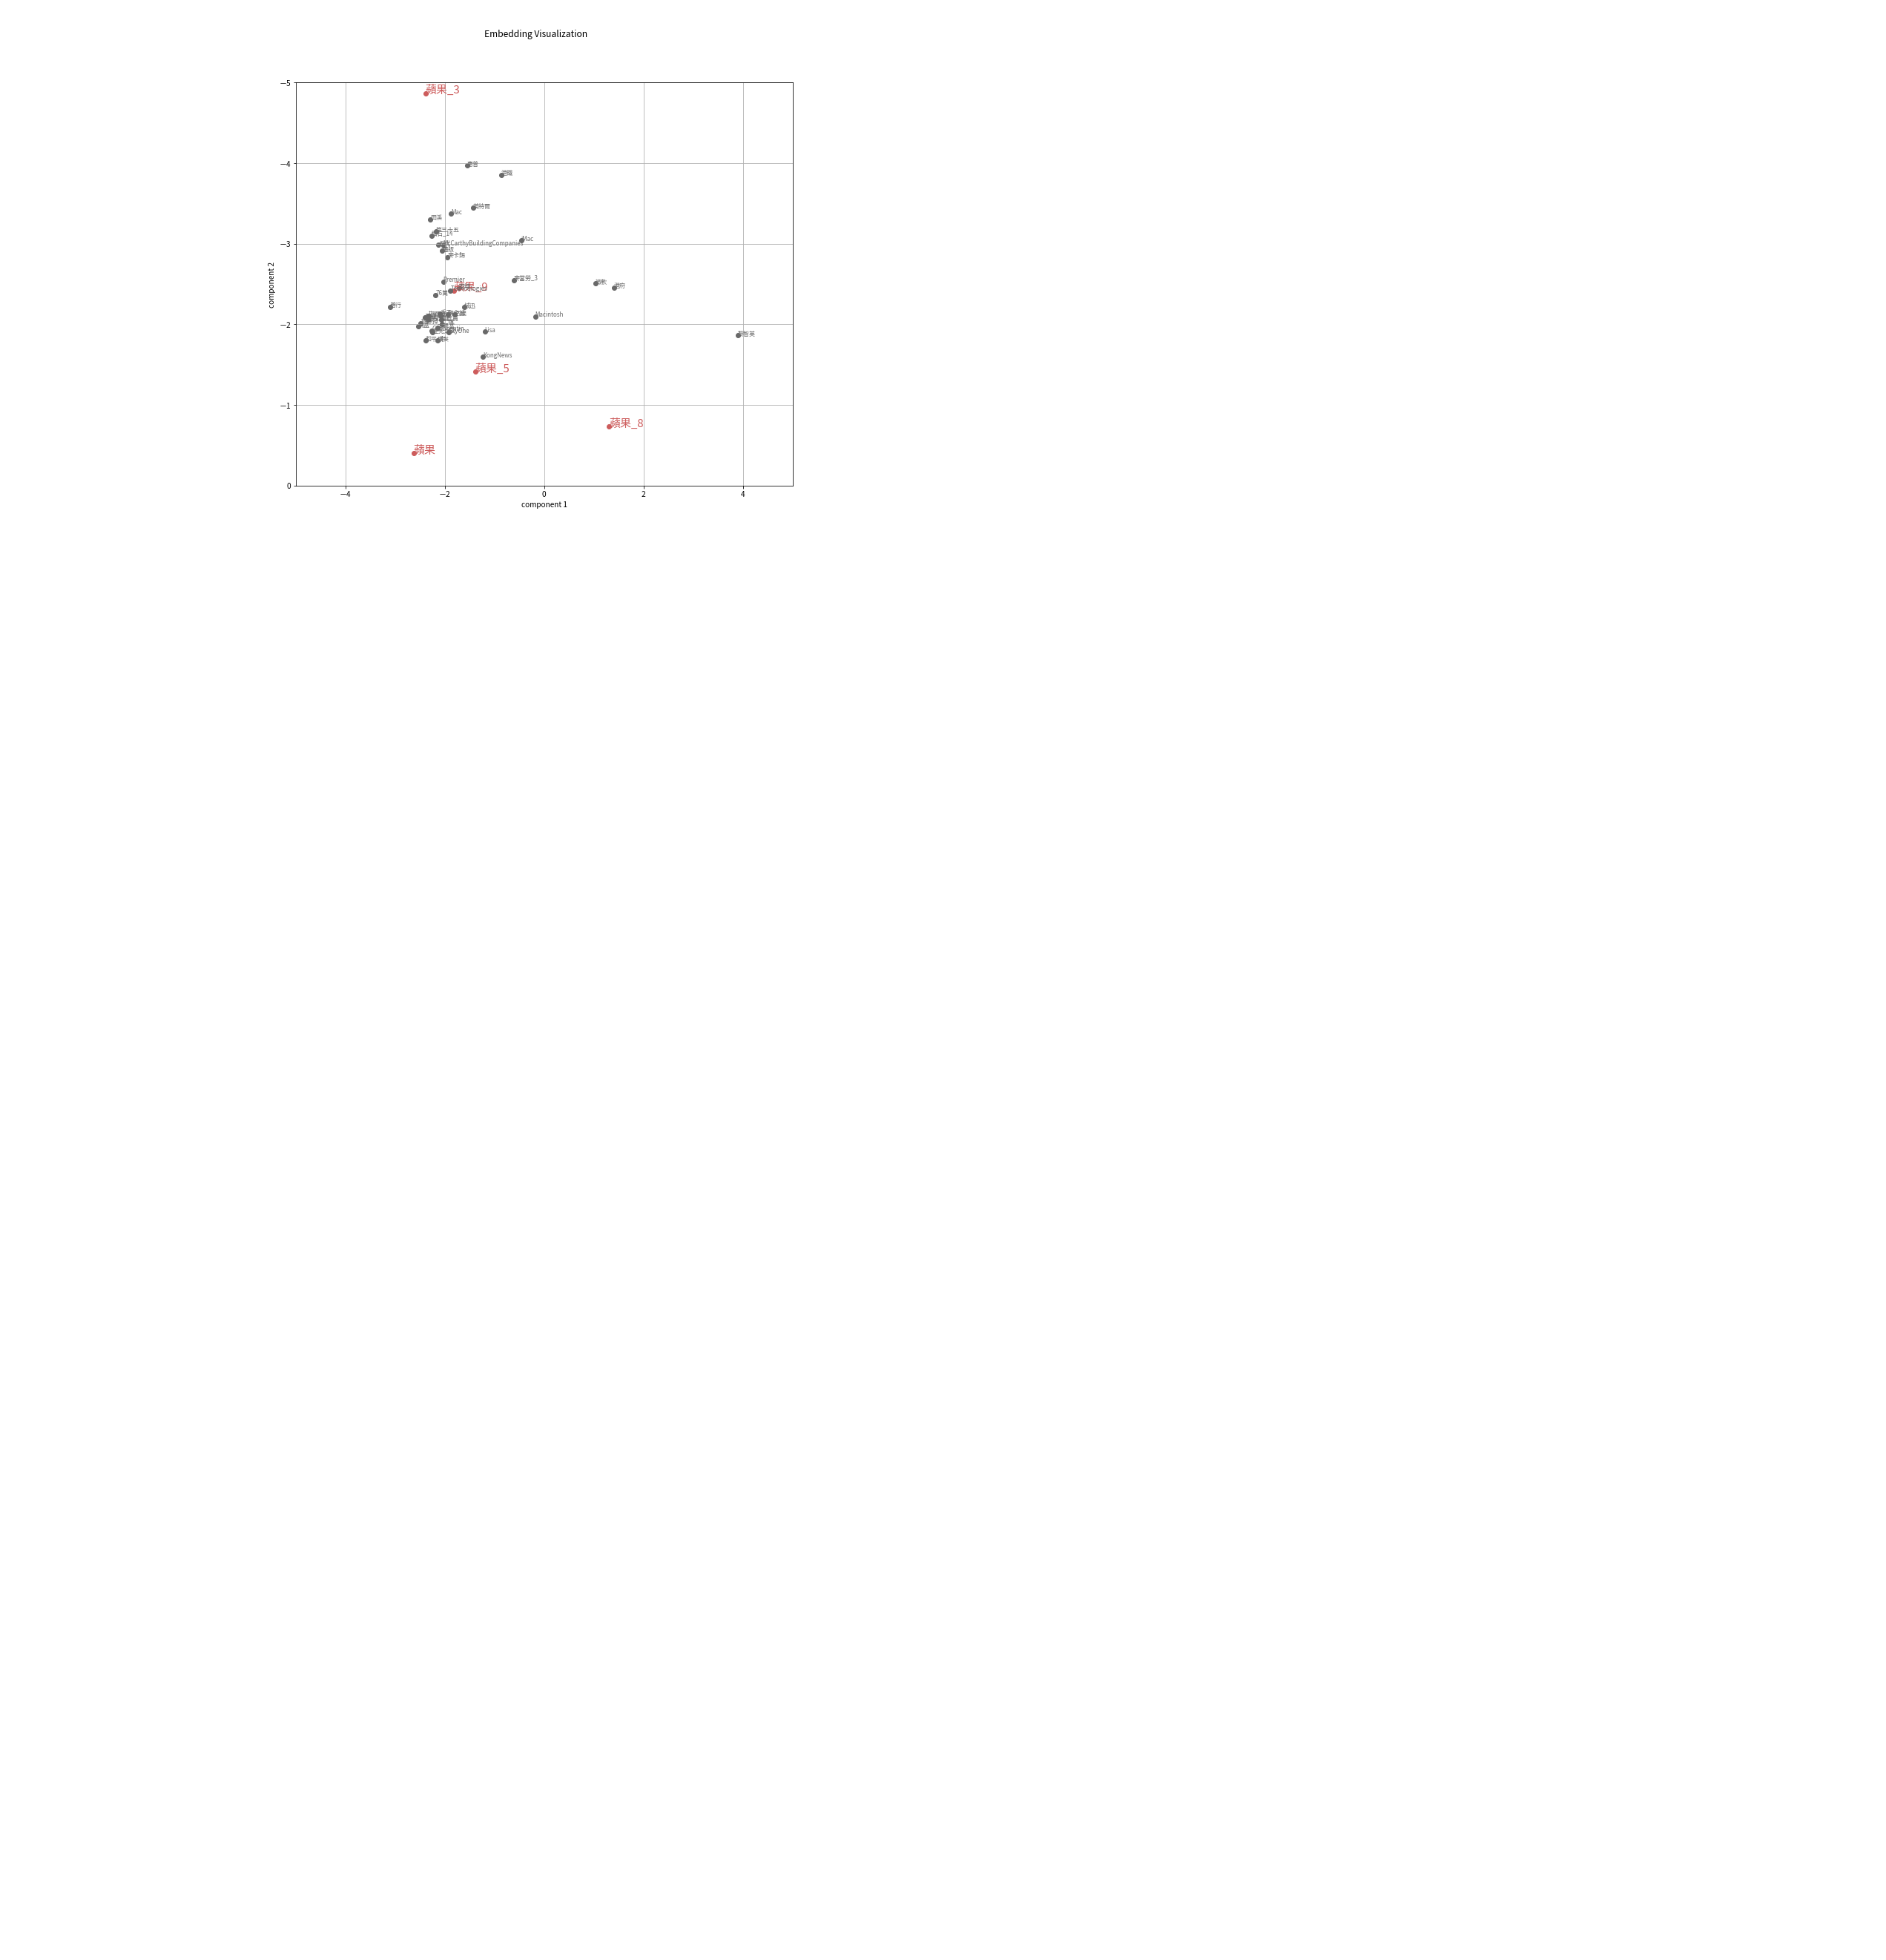

In [114]:
my_colors = {'蘋果':'coral'}
for i, (embid, text) in enumerate(zip(X_res, embedding_names)):
  if '蘋果' in text:
    # look for the color based on vocabulary, if not found in vocubulary, then black is returned.
    plt.scatter(X_res[i,0] , X_res[i,1], color = 'indianred')
    plt.annotate(text, (X_res[i,0] , X_res[i,1]), fontsize = 15, color = 'indianred')
  else:
    plt.scatter(X_res[i,0] , X_res[i,1], color = 'dimgray')
    plt.annotate(text, (X_res[i,0] , X_res[i,1]), fontsize = 8, color = 'dimgray')
plt.suptitle('Embedding Visualization')
plt.rcParams["figure.figsize"] = (12, 10)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.grid(True)
plt.xlim(-5, 5)
plt.ylim(0, -5)
plt.show()

## another word

In [174]:
TARGET = '星雲'

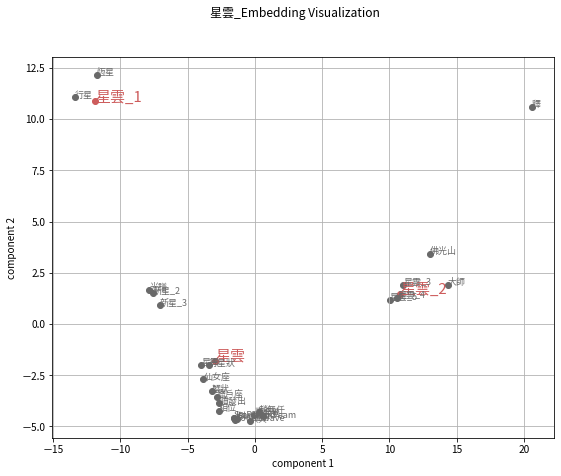

In [180]:
similar_words = {}
sims = [f'{TARGET}', f'{TARGET}_1', f'{TARGET}_2']
''', f'{TARGET}_3', f'{TARGET}_4', f'{TARGET}_5', 
     f'{TARGET}_6', f'{TARGET}_7', f'{TARGET}_8', f'{TARGET}_9', f'{TARGET}_10', f'{TARGET}_11',
     f'{TARGET}_12', f'{TARGET}_13']'''
for sim in sims:
  try:
    value = [item[0] for item in w2vmodel.wv.most_similar([sim], topn=10)]
    similar_words[sim] = value
  except: pass

flat_similar_words = [item for sublist in similar_words.values() for item in sublist]
embeddings= []
embedding_names = []
for i, w in enumerate(words):
  if w in flat_similar_words or w in sims: 
    embedding_names.append(w)
    embeddings.append(w2vmodel.wv[w])

X = np.vstack(embeddings)
X_normed = (X  - X.mean(axis=0)) / X.std(axis=0)
pca = PCA(n_components=2)
X_res = pca.fit_transform(X_normed)
for i, (embid, text) in enumerate(zip(X_res, embedding_names)):
  if text in sims:
    # look for the color based on vocabulary, if not found in vocubulary, then black is returned.
    plt.scatter(X_res[i,0] , X_res[i,1], color = 'indianred')
    plt.annotate(text, (X_res[i,0] , X_res[i,1]), fontsize = 15, color = 'indianred')
  else:
    plt.scatter(X_res[i,0] , X_res[i,1], color = 'dimgray')
    plt.annotate(text, (X_res[i,0] , X_res[i,1]), fontsize = 9, color = 'dimgray')
plt.suptitle(f'{TARGET}_Embedding Visualization')
plt.rcParams["figure.figsize"] = (9, 7)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.grid(True)
plt.savefig(f'embedding_{TARGET}.png')
plt.show() 

In [175]:
x = [i for i in leveled_list if i.word == TARGET]
x[0].senses

[{'category': 'main',
  'gloss': '星雲（源自拉丁文的：nebulae或nebulæ，與ligature或nebulas，意思就是“雲”',
  'ismain': True,
  'link': 'https://zh.wikipedia.org/wiki/%E6%98%9F%E4%BA%91',
  'sense': '星雲',
  'senseidx': 1,
  'views': 17100},
 {'category': '人名',
  'gloss': '釋星雲（“星雲大師”），1927年生，國際佛光會的創辦人。',
  'ismain': False,
  'link': 'https://zh.wikipedia.org/wiki/%E9%87%8B%E6%98%9F%E9%9B%B2',
  'sense': '釋星雲',
  'senseidx': 2,
  'views': 329033},
 {'category': '人名',
  'gloss': '星雲 (漫威漫畫)，漫威漫畫中的角色。',
  'ismain': False,
  'link': 'https://zh.wikipedia.org/wiki/%E6%98%9F%E4%BA%91_(%E6%BC%AB%E5%A8%81%E6%BC%AB%E7%94%BB)',
  'sense': '星雲 (漫威漫畫)',
  'senseidx': 3,
  'views': 1},
 {'category': '科幻',
  'gloss': '星雲 (航海家號)，一種科幻電視劇情節（在臺灣譯名：“星雲風暴”），1995年2月在聯合派拉蒙電視網（UPN）首播。',
  'ismain': False,
  'link': 'https://zh.wikipedia.org/wiki/%E6%98%9F%E4%BA%91_(%E8%88%AA%E6%B5%B7%E5%AE%B6%E5%8F%B7)',
  'sense': '星雲 (航海家號)',
  'senseidx': 4,
  'views': 1},
 {'category': '科幻',
  'gloss': '星雲 (科幻小說)。',
  'ismain': False,
  'link'

In [137]:
# w2vmodel.wv.most_similar(["泰山_13"], topn=10)

[('TCSA', 0.6152967810630798),
 ('福客多', 0.5772354006767273),
 ('新路', 0.5314732789993286),
 ('棒球隊', 0.5237336158752441),
 ('大墩', 0.5184191465377808),
 ('轉送', 0.5081079006195068),
 ('中油', 0.5079845190048218),
 ('詹仁道', 0.5031148195266724),
 ('詹嶽霖', 0.4983537197113037),
 ('ASUS', 0.49371716380119324)]